### Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle.com
### Predict whether the cancer is benign or malignant

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 1- Import Data

In [1]:
import pandas as pd
#read data from file
df_data = pd.read_csv('data.csv')

In [2]:
df_data.head(3) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# drop the two columns:  'id' - ID number, don't need. 'Unnamed:32' - are all null.
df_clean = df_data.drop(['id','Unnamed: 32'],axis=1)

Malignant = 212 Benign = 357


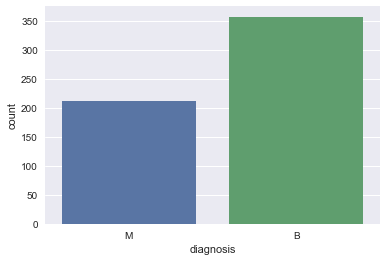

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#count the number of each cancer stage
sns.countplot(df_clean['diagnosis'],label="Count")
B, M = df_clean['diagnosis'].value_counts()
print('Malignant = {}'.format(M),'Benign = {}'.format(B))

In [6]:
df_clean.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

"Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)    
b) texture (standard deviation of gray-scale values)    
c) perimeter    
d) area    
e) smoothness (local variation in radius lengths)    
f) compactness (perimeter^2 / area - 1.0)    
g) concavity (severity of concave portions of the contour)    
h) concave points (number of concave portions of the contour)    
i) symmetry    
j) fractal dimension ("coastline approximation" - 1)    

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius."

reference: https://www.kaggle.com/rcfreitas/python-ml-breast-cancer-diagnostic-data-set/notebook

## 2 - Explore the Data 
### Visualizing and Analyze the data 

#### Three groups of features: feature_Mean, feature_SE,feature_Worst. are analyzed one by one. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

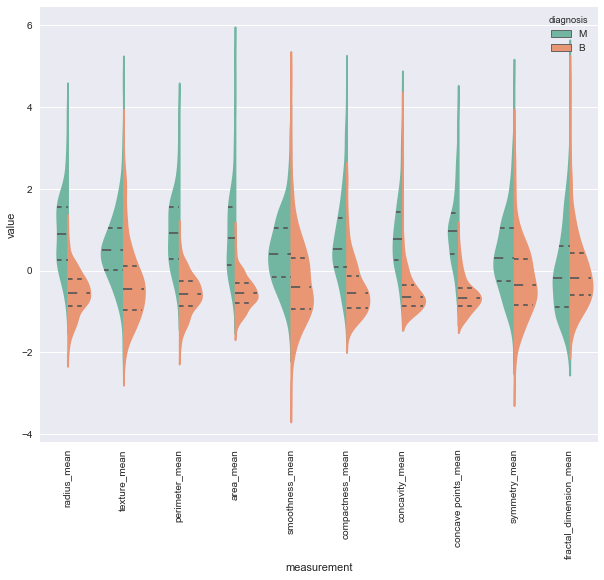

In [7]:
from sklearn import preprocessing

# First group: feature_Mean:

f_mean = pd.DataFrame(preprocessing.scale(df_clean.iloc[:,1:11]))
f_mean.columns = list(df_clean.iloc[:,1:11].columns)
f_mean['diagnosis'] = df_clean['diagnosis']

f_mean = pd.melt(f_mean, "diagnosis", var_name="measurement")
fig, ax = plt.subplots(figsize=(10,8))
p = sns.violinplot(ax=ax, x="measurement", y="value", hue="diagnosis", split = True, data=f_mean, inner = 'quartile', palette = 'Set2');
plt.xticks(rotation = 90)

Area_mean feature, M and B's median are different so the feature is ok for classification.     
But fractal_dimension_mean feature, medians are not so identical so not good for classification of M and Bs.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

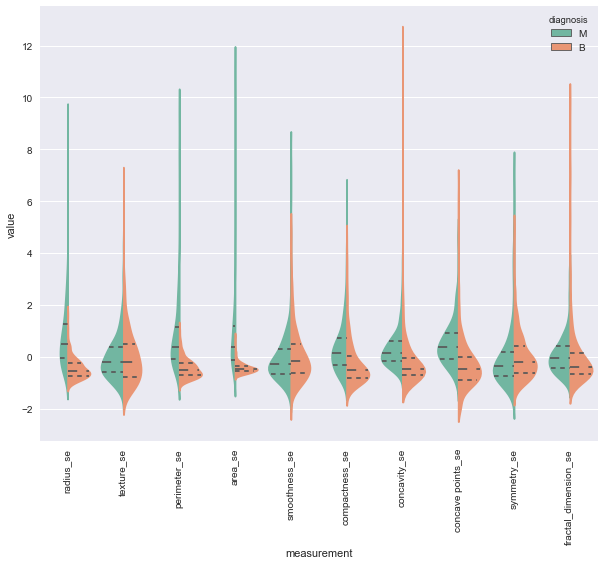

In [8]:
# Second group: feature_SE

f_se = pd.DataFrame(preprocessing.scale(df_clean.iloc[:,11:21]))
f_se.columns = list(df_clean.iloc[:,11:21].columns)
f_se['diagnosis'] = df_clean['diagnosis']

f_se = pd.melt(f_se, "diagnosis", var_name="measurement")
fig, ax = plt.subplots(figsize=(10,8))
p = sns.violinplot(ax=ax, x="measurement", y="value", hue="diagnosis", split = True, data=f_se, inner = 'quartile', palette = 'Set2');
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

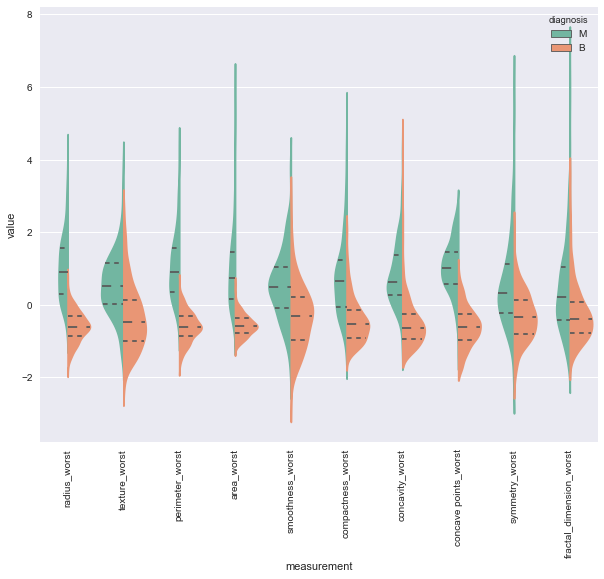

In [9]:
# Third group: feature_Worst

f_worst = pd.DataFrame(preprocessing.scale(df_clean.iloc[:,21:31]))
f_worst.columns = list(df_clean.iloc[:,21:31].columns)
f_worst['diagnosis'] = df_clean['diagnosis']

f_worst = pd.melt(f_worst, "diagnosis", var_name="measurement")
fig, ax = plt.subplots(figsize=(10,8))
p = sns.violinplot(ax=ax, x="measurement", y="value", hue="diagnosis", split = True, data=f_worst, inner = 'quartile', palette = 'Set2');
plt.xticks(rotation = 90)

### Correlation Map
#### Find similary features that dependens on each other

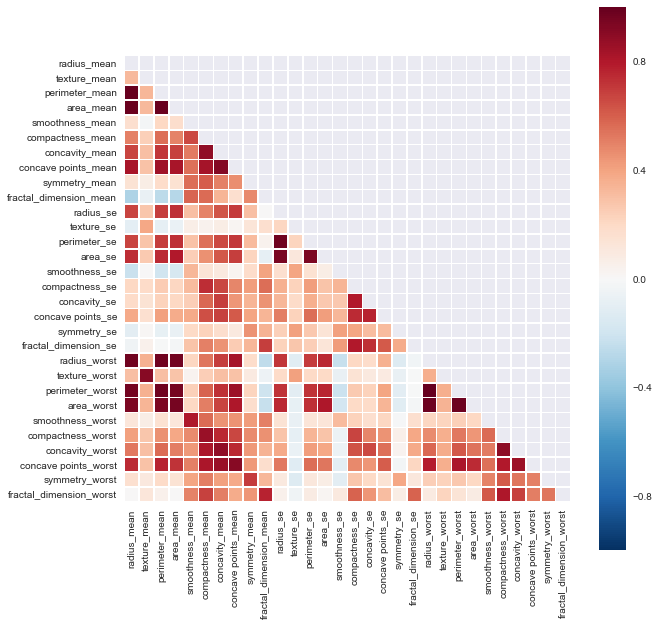

In [10]:
import numpy as np

corr = df_clean.corr()
fg, ax = plt.subplots(figsize = (10,10))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, linewidths = .5, square = True);

### Features Selection:     
compactness, concavity and concave point are correlated. concavity is choosed.           
radius, parameter and area are correlated. area is choosed.          
texture_mean and texture_worst are correlated. texture_mean is choosed.      
area_worst and area_mean are correlated. area_mean is choosed.     

In [11]:
drop_list = ['diagnosis','perimeter_mean','radius_mean',
             'compactness_mean','concave points_mean','radius_se',
             'perimeter_se','radius_worst','perimeter_worst',
             'compactness_worst','concave points_worst','compactness_se',
             'concave points_se','texture_worst','area_worst']
df_model = df_clean.drop(drop_list,axis = 1 ) 
df_model.head(3)

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758


## 3 - Model Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# split data into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(df_model, df_clean.diagnosis, 
                                                    test_size=0.2, random_state=1234)
print(X_train.shape)
print(X_test.shape)

(455, 16)
(114, 16)


### Random Forest Classifier

In [13]:
# Random Forest Classifier with n_estimators=100
clf_rf = RandomForestClassifier(n_estimators=100,random_state=1234)      

# Fit the RF Classifier with trainning set.
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)

Accuracy is:  0.929824561404


In [14]:
from sklearn.feature_selection import RFECV

clf_rf_ecv = RandomForestClassifier() 

# Find the best features using RFECV with 5-fold cross-validation
rf_ecv = RFECV(estimator=clf_rf_ecv, step=1, cv=5,
               scoring='accuracy')   

rf_ecv = rf_ecv.fit(X_train, y_train)

print('Optimal number of features :', rf_ecv.n_features_)
print('Best features :', X_train.columns[rf_ecv.support_])

Optimal number of features : 15
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


### Logistic Regression

In [15]:
# Logistic Regression
clf_lr = LogisticRegression(penalty = 'l2', dual = True)

# Fit the model
clf_lr_pred = clf_lr.fit(X_train, y_train) #.predict(X_test)

ac = accuracy_score(y_test,clf_lr.predict(X_test))
print('Accuracy is: ',ac)

Accuracy is:  0.710526315789


### Random Forest is better with accuracy 92%, with best 12 feature selection.

reference:       
https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization       
https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer      
